In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train_oriiginal = train.copy()
test_original = test.copy()

In [4]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,1/3/2016,TU 0712,CMN,TUN,1/3/2016 10:30,1/3/2016 12:55,ATA,TU 32AIMN,260
1,train_id_1,1/13/2016,TU 0757,MXP,TUN,1/13/2016 15:05,1/13/2016 16:55,ATA,TU 31BIMO,20
2,train_id_2,1/16/2016,TU 0214,TUN,IST,1/16/2016 4:10,1/16/2016 6:45,ATA,TU 32AIMN,0
3,train_id_3,1/17/2016,TU 0480,DJE,NTE,1/17/2016 14:10,1/17/2016 17:00,ATA,TU 736IOK,0
4,train_id_4,1/17/2016,TU 0338,TUN,ALG,1/17/2016 14:30,1/17/2016 15:50,ATA,TU 320IMU,22


In [5]:
train.shape

(107833, 10)

In [6]:
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,5/4/2016,TU 0700,DJE,TUN,5/4/2016 6:40,5/4/2016 7:30,ATA,TU 32AIMF
1,test_id_1,5/5/2016,TU 0395,TUN,BKO,5/5/2016 15:20,5/5/2016 20:05,ATA,TU 320IMW
2,test_id_2,5/6/2016,TU 0745,FRA,TUN,5/6/2016 10:00,5/6/2016 12:25,ATA,TU 32AIMC
3,test_id_3,5/11/2016,TU 0848,BEY,TUN,5/11/2016 9:40,5/11/2016 13:10,ATA,TU 31BIMO
4,test_id_4,5/11/2016,TU 0635,ORY,MIR,5/11/2016 9:50,5/11/2016 12:35,ATA,TU 736IOQ


In [7]:
test.shape

(9333, 9)

In [8]:
train.dtypes

ID        object
DATOP     object
FLTID     object
DEPSTN    object
ARRSTN    object
STD       object
STA       object
STATUS    object
AC        object
target     int64
dtype: object

In [9]:
test.dtypes

ID        object
DATOP     object
FLTID     object
DEPSTN    object
ARRSTN    object
STD       object
STA       object
STATUS    object
AC        object
dtype: object

In [10]:
train.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [11]:
test.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
dtype: int64

### Exploratory data Analayis 


In [12]:
train.ARRSTN.value_counts()

TUN    42572
DJE    10198
ORY     6755
MIR     5251
MRS     2845
       ...  
SKG        1
TMR        1
KBP        1
ESB        1
DOH        1
Name: ARRSTN, Length: 128, dtype: int64

In [13]:
train.DEPSTN.value_counts()

TUN    42522
DJE    10252
ORY     6755
MIR     5248
MRS     2845
       ...  
ESB        1
KBP        1
STR        1
OTP        1
CTA        1
Name: DEPSTN, Length: 132, dtype: int64

In [14]:
train.STATUS.value_counts()

ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: STATUS, dtype: int64

In [15]:
train.FLTID.value_counts()

WKL 0000     3105
TU 0613      1284
TU 0397      1184
AOG 0000     1103
TU 0634      1075
             ... 
UH 1759         1
GJT 0828        1
TU 3135         1
TU 3714         1
TU 9211         1
Name: FLTID, Length: 1861, dtype: int64

In [16]:
train.AC.value_counts()

TU 320IMU    4724
TU 320IMW    4685
TU 320IMT    4634
TU 320IMR    4601
TU 320IMV    4589
             ... 
TU CR9CR9       6
OL 321ABY       5
TU CR9XXX       2
TU 32A32A       2
TU 320320       1
Name: AC, Length: 68, dtype: int64

<AxesSubplot:xlabel='target', ylabel='Density'>

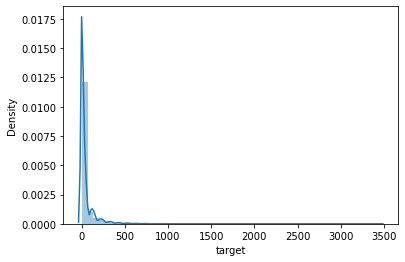

In [17]:
sns.distplot(train.target)

### Feature engineering and preprocessing

In [18]:
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


In [19]:
train['STD'] = pd.to_datetime(train['STD'], errors='coerce')
train['STA'] = pd.to_datetime(train['STA'], errors='coerce')

In [20]:
test['STD'] = pd.to_datetime(test['STD'], errors='coerce')
test['STA'] = pd.to_datetime(test['STA'], errors='coerce')

In [21]:
train['D_hour'] = train['STD'].dt.hour
train['D_minute'] = train['STD'].dt.minute
train['A_hour'] = train['STA'].dt.hour
train['A_minute'] = train['STA'].dt.minute

In [22]:
test['D_hour'] = test['STD'].dt.hour
test['D_minute'] = test['STD'].dt.minute
test['A_hour'] = test['STA'].dt.hour
test['A_minute'] = test['STA'].dt.minute

In [23]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,D_hour,D_minute,A_hour,A_minute
0,train_id_0,1/3/2016,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260,10,30,12,55
1,train_id_1,1/13/2016,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20,15,5,16,55
2,train_id_2,1/16/2016,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0,4,10,6,45
3,train_id_3,1/17/2016,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0,14,10,17,0
4,train_id_4,1/17/2016,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22,14,30,15,50


In [24]:
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,D_hour,D_minute,A_hour,A_minute
0,test_id_0,5/4/2016,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,6,40,7,30
1,test_id_1,5/5/2016,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,15,20,20,5
2,test_id_2,5/6/2016,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,10,0,12,25
3,test_id_3,5/11/2016,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,9,40,13,10
4,test_id_4,5/11/2016,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,9,50,12,35


In [25]:
train.dtypes

ID                  object
DATOP               object
FLTID               object
DEPSTN              object
ARRSTN              object
STD         datetime64[ns]
STA         datetime64[ns]
STATUS              object
AC                  object
target               int64
D_hour               int64
D_minute             int64
A_hour               int64
A_minute             int64
dtype: object

In [26]:
train['tota_departure'] = train['D_hour']*60 + train['D_minute']
train['tota_arrival'] = train['A_hour']*60 + train['A_minute']
test['tota_departure'] = test['D_hour']*60 + train['D_minute']
test['tota_arrival'] = test['A_hour']*60 + train['A_minute']

In [27]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,D_hour,D_minute,A_hour,A_minute,tota_departure,tota_arrival
0,train_id_0,1/3/2016,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260,10,30,12,55,630,775
1,train_id_1,1/13/2016,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20,15,5,16,55,905,1015
2,train_id_2,1/16/2016,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0,4,10,6,45,250,405
3,train_id_3,1/17/2016,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0,14,10,17,0,850,1020
4,train_id_4,1/17/2016,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22,14,30,15,50,870,950


In [28]:
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,D_hour,D_minute,A_hour,A_minute,tota_departure,tota_arrival
0,test_id_0,5/4/2016,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,6,40,7,30,390.0,475.0
1,test_id_1,5/5/2016,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,15,20,20,5,905.0,1255.0
2,test_id_2,5/6/2016,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,10,0,12,25,610.0,765.0
3,test_id_3,5/11/2016,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,9,40,13,10,550.0,780.0
4,test_id_4,5/11/2016,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,9,50,12,35,570.0,770.0


In [29]:
train['A_D_time_diff'] = train['tota_arrival'] - train['tota_departure']
test['A_D_time_diff'] = test['tota_arrival'] - test['tota_departure']

In [30]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,D_hour,D_minute,A_hour,A_minute,tota_departure,tota_arrival,A_D_time_diff
0,train_id_0,1/3/2016,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260,10,30,12,55,630,775,145
1,train_id_1,1/13/2016,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20,15,5,16,55,905,1015,110
2,train_id_2,1/16/2016,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0,4,10,6,45,250,405,155
3,train_id_3,1/17/2016,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0,14,10,17,0,850,1020,170
4,train_id_4,1/17/2016,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22,14,30,15,50,870,950,80


In [31]:
train1 = train.drop(['DATOP', 'STD', 'STA', 'D_hour', 'D_minute', 'A_hour', 'A_minute', 'tota_departure', 'tota_arrival'], axis=1)
test1 = test.drop(['DATOP', 'STD', 'STA', 'D_hour', 'D_minute', 'A_hour', 'A_minute', 'tota_departure', 'tota_arrival'], axis=1)

In [32]:
train1.head()

,ID,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,A_D_time_diff
0,train_id_0,TU 0712,CMN,TUN,ATA,TU 32AIMN,260,145
1,train_id_1,TU 0757,MXP,TUN,ATA,TU 31BIMO,20,110
2,train_id_2,TU 0214,TUN,IST,ATA,TU 32AIMN,0,155
3,train_id_3,TU 0480,DJE,NTE,ATA,TU 736IOK,0,170
4,train_id_4,TU 0338,TUN,ALG,ATA,TU 320IMU,22,80


In [33]:
test1.head()

,ID,FLTID,DEPSTN,ARRSTN,STATUS,AC,A_D_time_diff
0,test_id_0,TU 0700,DJE,TUN,ATA,TU 32AIMF,85.0
1,test_id_1,TU 0395,TUN,BKO,ATA,TU 320IMW,350.0
2,test_id_2,TU 0745,FRA,TUN,ATA,TU 32AIMC,155.0
3,test_id_3,TU 0848,BEY,TUN,ATA,TU 31BIMO,230.0
4,test_id_4,TU 0635,ORY,MIR,ATA,TU 736IOQ,200.0


In [34]:
X= train1.drop(['ID', 'target'], axis=1)
y= train1.target
test1 = test1.drop('ID', axis=1)

In [35]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [36]:
le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

,FLTID,DEPSTN,ARRSTN,STATUS,AC
0,230,31,119,0,46
1,257,86,119,0,28
2,86,123,58,0,46
3,164,37,91,0,50
4,136,123,4,0,34
5,119,117,119,0,54
6,175,123,10,0,42
7,235,123,94,0,43
8,254,123,46,0,38
9,299,123,87,0,27


In [37]:
test_categorical_feature_mask = test1.dtypes==object
# filter categorical columns using mask and turn it into a list
test_categorical_cols = test1.columns[test_categorical_feature_mask].tolist()

In [38]:
test1[test_categorical_cols] = test1[test_categorical_cols].apply(lambda col: le.fit_transform(col))
test1[test_categorical_cols].head(10)

,FLTID,DEPSTN,ARRSTN,STATUS,AC
0,124,23,76,0,22
1,53,74,9,0,19
2,151,29,76,0,20
3,172,7,76,0,12
4,109,62,50,0,37
5,684,17,69,2,39
6,79,5,76,0,22
7,133,19,76,0,28
8,153,45,76,0,15
9,151,29,76,0,20


In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test1.shape)

(86266, 6)
(21567, 6)
(86266,)
(21567,)
(9333, 6)


In [41]:
scaller = MinMaxScaler()
X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)
test1_scaled = scaller.transform(test1)

In [42]:
lr = LinearRegression().fit(X_train_scaled, y_train)


In [43]:
y_predicted = lr.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted, y_test)))

116.98143215314917


In [44]:
ridge = Ridge().fit(X_train_scaled, y_train)


In [45]:
y_predicted1 = ridge.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted1, y_test)))

116.98143283316566


In [46]:
lasso = Lasso().fit(X_train_scaled, y_train)

In [47]:
y_predicted2 = lasso.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted2, y_test)))

117.11489050630098


In [48]:
alphas = [0.0000000000000001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [49]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train_scaled, y_train)   
    score = model.score(X_train_scaled, y_train)
    pred_y = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0000, R2:0.03, MSE:13684.66, RMSE:116.98
Alpha:0.0001, R2:0.03, MSE:13684.66, RMSE:116.98
Alpha:0.0010, R2:0.03, MSE:13684.69, RMSE:116.98
Alpha:0.0100, R2:0.03, MSE:13685.78, RMSE:116.99
Alpha:0.1000, R2:0.02, MSE:13712.53, RMSE:117.10
Alpha:0.3000, R2:0.02, MSE:13778.63, RMSE:117.38
Alpha:0.5000, R2:0.02, MSE:13829.08, RMSE:117.60
Alpha:0.7000, R2:0.01, MSE:13865.65, RMSE:117.75
Alpha:1.0000, R2:0.01, MSE:13903.94, RMSE:117.91


In [50]:
RFR = RandomForestRegressor()
RFR.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [51]:
y_predicted3 = RFR.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted3, y_test)))

116.3934117919465


In [52]:
RFR.feature_importances_

array([0.29684555, 0.10733753, 0.08516288, 0.05231869, 0.27592916,
       0.1824062 ])

In [53]:
xgb = XGBRFRegressor().fit(X_train_scaled, y_train)

In [54]:
y_predicted4 = xgb.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted4, y_test)))

115.58567149515027


In [55]:
ADR = AdaBoostRegressor()
ADR.fit(X_train_scaled, y_train)

AdaBoostRegressor()

In [56]:
y_predicted_adb = ADR.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted_adb, y_test)))

125.06722536427436


In [57]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [58]:
y_predicted_GBR = GBR.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_predicted_GBR, y_test)))

114.63385921278234


In [59]:
target = GBR.predict(test1_scaled)

In [60]:
test_original['target']=target
test_original.to_csv('submission.csv')